 # Predicting continuous variables 
 Using Boston housing prices dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
from keras.datasets import boston_housing
(x_train, y_train),(x_test,y_test)=boston_housing.load_data()
x_train[1], y_train[1]

(array([2.1770e-02, 8.2500e+01, 2.0300e+00, 0.0000e+00, 4.1500e-01,
        7.6100e+00, 1.5700e+01, 6.2700e+00, 2.0000e+00, 3.4800e+02,
        1.4700e+01, 3.9538e+02, 3.1100e+00]), 42.3)

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

key = ['Per capita crime rate.',
'The proportion of residential land zoned for lots over 25,000 square feet.',
'The proportion of non-retail business acres per town.',
'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).',
'Nitric oxides concentration (parts per 10 million).',
'The average number of rooms per dwelling.',
'The proportion of owner-occupied units built before 1940.',
'Weighted distances to five Boston employment centers.',
'Index of accessibility to radial highways.',
'Full-value property-tax rate per $10,000.',
'Pupil-teacher ratio by town.',
'1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.',
'Percentage lower status of the population.']

col_index = dict(zip(column_names, key))
col_index

{'CRIM': 'Per capita crime rate.',
 'ZN': 'The proportion of residential land zoned for lots over 25,000 square feet.',
 'INDUS': 'The proportion of non-retail business acres per town.',
 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).',
 'NOX': 'Nitric oxides concentration (parts per 10 million).',
 'RM': 'The average number of rooms per dwelling.',
 'AGE': 'The proportion of owner-occupied units built before 1940.',
 'DIS': 'Weighted distances to five Boston employment centers.',
 'RAD': 'Index of accessibility to radial highways.',
 'TAX': 'Full-value property-tax rate per $10,000.',
 'PTRATIO': 'Pupil-teacher ratio by town.',
 'B': '1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.',
 'LSTAT': 'Percentage lower status of the population.'}

In [4]:
#To perform K-fold cross validation
#Concatnate train and test set into one single dataset

x_train = np.concatenate((x_train,x_test), axis=0)
y_train = np.concatenate((y_train,y_test), axis=0)

x_train.shape, y_train.shape

((506, 13), (506,))

In [5]:
df = pd.DataFrame(x_train, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std
print(x_train[0]) #First Training sample, normalized

[-0.2770909  -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.20320532
  0.82234174  0.08644935 -0.6379618  -0.6012761   1.17646583  0.44105193
  0.85042548]


Since a continuous variable is predicted, there is no activation layer at the last level, and only 1 neuron <br>
MAE will be used as metric for understandability, as the MSE is difficult to interpretate for humans

In [79]:
model = Sequential()
model.add(Dense(26, activation = 'relu', input_shape = (13,)))
model.add(Dense(26, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1))

In [80]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001),loss = 'mse', metrics=['mae'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 26)                364       
_________________________________________________________________
dense_56 (Dense)             (None, 26)                702       
_________________________________________________________________
dense_57 (Dense)             (None, 12)                324       
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 13        
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [81]:
network_metadata = model.fit(x_train, y_train,
                             validation_data=(x_test, y_test),
                             epochs=200, 
                             batch_size=50)

Train on 506 samples, validate on 102 samples
Epoch 1/200
506/506 [==============================] - 0s 731us/step - loss: 578.2645 - mean_absolute_error: 22.1953 - val_loss: 587.5541 - val_mean_absolute_error: 22.4141
Epoch 2/200
506/506 [==============================] - 0s 42us/step - loss: 554.5571 - mean_absolute_error: 21.6233 - val_loss: 564.7923 - val_mean_absolute_error: 21.8744
Epoch 3/200
506/506 [==============================] - 0s 37us/step - loss: 530.2175 - mean_absolute_error: 21.0120 - val_loss: 536.6338 - val_mean_absolute_error: 21.1820
Epoch 4/200
506/506 [==============================] - 0s 42us/step - loss: 498.7071 - mean_absolute_error: 20.2129 - val_loss: 498.4026 - val_mean_absolute_error: 20.2223
Epoch 5/200
506/506 [==============================] - 0s 38us/step - loss: 456.6799 - mean_absolute_error: 19.1174 - val_loss: 450.2059 - val_mean_absolute_error: 19.0018
Epoch 6/200
506/506 [==============================] - 0s 41us/step - loss: 408.0132 - mean_a

Epoch 49/200
506/506 [==============================] - 0s 36us/step - loss: 12.8880 - mean_absolute_error: 2.5032 - val_loss: 16.6112 - val_mean_absolute_error: 2.8815
Epoch 50/200
506/506 [==============================] - 0s 42us/step - loss: 12.7501 - mean_absolute_error: 2.4882 - val_loss: 16.0604 - val_mean_absolute_error: 2.8826
Epoch 51/200
506/506 [==============================] - 0s 36us/step - loss: 12.6296 - mean_absolute_error: 2.4976 - val_loss: 16.6118 - val_mean_absolute_error: 2.8815
Epoch 52/200
506/506 [==============================] - 0s 34us/step - loss: 12.4946 - mean_absolute_error: 2.4692 - val_loss: 17.3226 - val_mean_absolute_error: 2.9716
Epoch 53/200
506/506 [==============================] - 0s 35us/step - loss: 12.3262 - mean_absolute_error: 2.4985 - val_loss: 16.2455 - val_mean_absolute_error: 2.8417
Epoch 54/200
506/506 [==============================] - 0s 35us/step - loss: 12.1894 - mean_absolute_error: 2.4476 - val_loss: 16.1929 - val_mean_absolute_

506/506 [==============================] - 0s 37us/step - loss: 9.1890 - mean_absolute_error: 2.1254 - val_loss: 12.3305 - val_mean_absolute_error: 2.5058
Epoch 98/200
506/506 [==============================] - 0s 42us/step - loss: 9.2489 - mean_absolute_error: 2.1240 - val_loss: 11.7385 - val_mean_absolute_error: 2.4057
Epoch 99/200
506/506 [==============================] - 0s 37us/step - loss: 9.1003 - mean_absolute_error: 2.1154 - val_loss: 10.8371 - val_mean_absolute_error: 2.2729
Epoch 100/200
506/506 [==============================] - 0s 36us/step - loss: 8.9904 - mean_absolute_error: 2.1120 - val_loss: 11.4400 - val_mean_absolute_error: 2.3690
Epoch 101/200
506/506 [==============================] - 0s 35us/step - loss: 9.0143 - mean_absolute_error: 2.0996 - val_loss: 11.5453 - val_mean_absolute_error: 2.3961
Epoch 102/200
506/506 [==============================] - 0s 33us/step - loss: 8.9598 - mean_absolute_error: 2.0921 - val_loss: 12.0489 - val_mean_absolute_error: 2.4818
Ep

506/506 [==============================] - 0s 35us/step - loss: 7.7836 - mean_absolute_error: 1.9845 - val_loss: 9.3640 - val_mean_absolute_error: 2.1661
Epoch 146/200
506/506 [==============================] - 0s 36us/step - loss: 7.6614 - mean_absolute_error: 1.9562 - val_loss: 11.4666 - val_mean_absolute_error: 2.4907
Epoch 147/200
506/506 [==============================] - 0s 32us/step - loss: 7.8251 - mean_absolute_error: 1.9726 - val_loss: 9.7655 - val_mean_absolute_error: 2.2120
Epoch 148/200
506/506 [==============================] - 0s 35us/step - loss: 7.7038 - mean_absolute_error: 1.9544 - val_loss: 10.7339 - val_mean_absolute_error: 2.3200
Epoch 149/200
506/506 [==============================] - 0s 35us/step - loss: 7.6619 - mean_absolute_error: 1.9699 - val_loss: 8.7238 - val_mean_absolute_error: 2.0738
Epoch 150/200
506/506 [==============================] - 0s 34us/step - loss: 7.5868 - mean_absolute_error: 1.9444 - val_loss: 8.7697 - val_mean_absolute_error: 2.0730
Epoc

Epoch 194/200
506/506 [==============================] - 0s 34us/step - loss: 6.9010 - mean_absolute_error: 1.8890 - val_loss: 7.0992 - val_mean_absolute_error: 1.9341
Epoch 195/200
506/506 [==============================] - 0s 42us/step - loss: 6.7091 - mean_absolute_error: 1.8430 - val_loss: 7.9990 - val_mean_absolute_error: 2.0922
Epoch 196/200
506/506 [==============================] - 0s 35us/step - loss: 6.7164 - mean_absolute_error: 1.8528 - val_loss: 7.2114 - val_mean_absolute_error: 1.9454
Epoch 197/200
506/506 [==============================] - 0s 40us/step - loss: 6.6882 - mean_absolute_error: 1.8467 - val_loss: 7.2889 - val_mean_absolute_error: 1.9805
Epoch 198/200
506/506 [==============================] - 0s 35us/step - loss: 6.5809 - mean_absolute_error: 1.8467 - val_loss: 7.6661 - val_mean_absolute_error: 2.0410
Epoch 199/200
506/506 [==============================] - 0s 36us/step - loss: 6.6658 - mean_absolute_error: 1.8476 - val_loss: 7.1569 - val_mean_absolute_error:

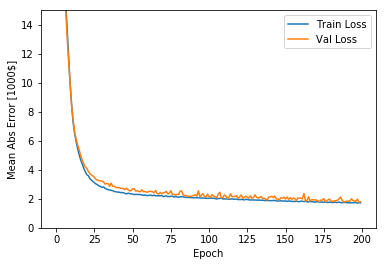

In [77]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label= 'Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label= 'Val Loss')
    plt.legend()
    plt.ylim([0, 15])
    
plot_history(network_metadata)

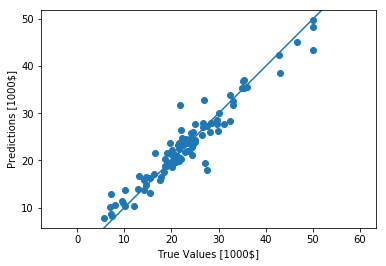

In [78]:
# plot predictions
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

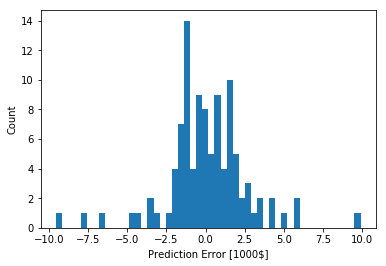

In [82]:
# number of errors

error = test_predictions - y_test
plt.hist(error, bins = 50)
plt.xlabel('Prediction Error [1000$]')
_ = plt.ylabel('Count')

## K-Fold Validation approach
Train and test set will be concatenated

In [83]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [84]:
x_train = np.concatenate((x_train,x_test), axis=0)
y_train = np.concatenate((y_train,y_test), axis=0)
x_train.shape, y_train.shape

((506, 13), (506,))

In [85]:
#Small model to establish baseline
# kernel_initializer sets the weights

def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(optimizer= optimizers.RMSprop(lr=0.001),loss='mse',metrics=['mae'])
    return model
baseline = baseline_model()
baseline.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Larger models below let tune the model and determine where overfitting occurs,
# Then the model hyperparameters can be adjusted (number of layers/neurons per layer accordingly)

def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])
    return model

larger = larger_model()
larger.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_62 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [87]:
def wider_model():
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])
    return model

wider = wider_model()
wider.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [88]:
def wider_deeper_model():
    model = Sequential()
    model.add(Dense(25, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mae'])
    return model

wdmodel = wider_deeper_model()
wdmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 25)                350       
_________________________________________________________________
dense_67 (Dense)             (None, 18)                468       
_________________________________________________________________
dense_68 (Dense)             (None, 7)                 133       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 8         
Total params: 959
Trainable params: 959
Non-trainable params: 0
_________________________________________________________________


In [89]:
#define a list variable holding each model function

all_models = [baseline_model, larger_model, wider_model, wider_deeper_model ]


type(all_models[1])

function

In [90]:
#set seed for reproducability 
seed = 7

def build_pipeline(model):
    # Add a data Scaler and the keras regressor containing our model function to a list of estimators

    estimators = []
    estimators.append(('standardize', StandardScaler()))
    # mlp + Multilayer Perceptron
    estimators.append(('mlp', KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)))

    #add our estimator list to a Sklearn pipeline
    # the Pipeline will first standardize the data, then use the mlp
    pipeline = Pipeline(estimators)
    
    return pipeline
 
#initialize instance of k-fold validation from sklearn api

kfold = KFold(n_splits=5, random_state=seed)

In [91]:
#for each model

for i in all_models:
    
    #initialize fixed random weights
    np.random.seed(seed)
    
    #pass pipeline instance, training data and labels, and k-fold crossvalidator instance to evaluate score

    results = cross_val_score(build_pipeline(i), x_train, y_train, cv=kfold)

    #Print name of model being evaluated    
    print('Model Type:', i)
    
    #The results variable contains the mean squared errors for each of our 5 cross validation runs.
    print('MSE per fold:')
    print(results)
    
    #Print mean and sd of all five folds, per model
    print("Average MSE of all 5 runs: %.2f, with standard dev: (%.2f)" % (-1*(results.mean()), results.std()))

Model Type: <function baseline_model at 0x7f4e081186a8>
MSE per fold:
[-14.13488976 -12.54551139 -18.06756492 -21.03982773 -16.93706886]
Average MSE of all 5 runs: 16.54, with standard dev: (2.98)
Model Type: <function larger_model at 0x7f4dd0fb0bf8>
MSE per fold:
[ -9.54520009 -10.57465797 -15.79457061 -15.04164785 -20.41423312]
Average MSE of all 5 runs: 14.27, with standard dev: (3.92)
Model Type: <function wider_model at 0x7f4dd0fb0400>
MSE per fold:
[-12.12505456 -11.19075274 -16.498146   -18.73591729 -17.52832226]
Average MSE of all 5 runs: 15.22, with standard dev: (3.00)
Model Type: <function wider_deeper_model at 0x7f4dd0fb0510>
MSE per fold:
[ -8.10241032  -9.92895944 -13.26655445 -12.06171144 -18.36031142]
Average MSE of all 5 runs: 12.34, with standard dev: (3.49)
